Assignment #01 (Chapter #1 and #2)

Submitted by Wania Naeem, 22i-2369 of CS-Z (Robo)

For this assignment, I have used a public dataset from Kaggle: Road Accidents in UK (2000 - 2018). It has over 1.8 million features and 33 features with majorly numerical features and some categorical features. The details on this dataset and model will be provided in the report.

This assignment is going to predict the severity of the accidents in UK based on the data.

<p align="left">
  <a href="https://colab.research.google.com/github/Wania-n/ML_A-01_Road-Accidents-UK/blob/main/22i-2369_ML_A1.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" height="30">
  </a>
  <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/Wania-n/ML_A-01_Road-Accidents-UK/main/22i-2369_ML_A1.ipynb">
    <img src="https://kaggle.com/static/images/open-in-kaggle.svg" height="30">
  </a>
</p>

1. Installing the Kaggle API (Run this if not installed!)

In [ ]:
!pip install kaggle

2. Downloading the Dataset from Kaggle

In [ ]:
import os

# This is the dataset name from kaggle
dataset_name = "devansodariya/road-accident-united-kingdom-uk-dataset"
download_path = "datasets"

# Make the folder and run the downloading command
os.makedirs(download_path, exist_ok=True)
os.system(f"kaggle datasets download -d {dataset_name} -p {download_path} --unzip")

# After running this cell, a folder named 'datasets' will be created in the directory as this file.
# The dataset will be downloaded in that folder and be named 'UK_Accident.csv' of 449.67 MBs

3. Extracting the Dataset into the code

In [1]:
import pandas as pd

# Reading the dataset using pandas, ignoring the first column, because it is an index column
dataset = pd.read_csv("datasets/UK_Accident.csv", index_col=0)

# Due to the large values, I limited the decimal places to 4 to easily understand the data
pd.set_option('display.float_format', '{:.4f}'.format)


4. Describing the data

In [2]:
# Describing the Dataset
dataset.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1504049.0000,1504150.0000,1504049.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000
mean,439621.4051,300138.2491,-1.4366,52.5859,30.2054,2.8382,1.8316,1.3510,4.1186,347.6149,4.0880,1009.9191,39.0054,2.6751,381.5684,1.3539,2009.3697
std,95116.1603,161021.7621,1.3981,1.5125,25.5160,0.4018,0.7148,0.8253,1.9244,259.4292,1.4289,1823.5177,14.1399,3.2055,1302.5546,0.4784,3.0135
min,64950.0000,0.0000,-7.5162,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,10.0000,-1.0000,-1.0000,1.0000,2005.0000
25%,375060.0000,178260.0000,-2.3739,51.4901,6.0000,3.0000,1.0000,1.0000,2.0000,110.0000,3.0000,0.0000,30.0000,-1.0000,0.0000,1.0000,2006.0000
50%,439960.0000,268800.0000,-1.4037,52.3089,30.0000,3.0000,2.0000,1.0000,4.0000,322.0000,4.0000,129.0000,30.0000,3.0000,0.0000,1.0000,2010.0000
75%,523060.0000,398150.0000,-0.2215,53.4786,45.0000,3.0000,2.0000,1.0000,6.0000,518.0000,6.0000,725.0000,50.0000,6.0000,0.0000,2.0000,2012.0000
max,655370.0000,1208800.0000,1.7594,60.7575,98.0000,3.0000,67.0000,93.0000,7.0000,941.0000,6.0000,9999.0000,70.0000,6.0000,9999.0000,3.0000,2014.0000


In [3]:
# Checking the first 5 rows of the dataset
print(dataset.head())

  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001            525680.0000             178240.0000    -0.1912   
1  200501BS00002            524170.0000             181650.0000    -0.2117   
2  200501BS00003            524520.0000             182240.0000    -0.2065   
3  200501BS00004            526900.0000             177530.0000    -0.1739   
4  200501BS00005            528060.0000             179040.0000    -0.1566   

   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0   51.4891             1                  2                   1   
1   51.5201             1                  3                   1   
2   51.5253             1                  3                   2   
3   51.4824             1                  3                   1   
4   51.4958             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  04/01/2005  ...   
1                     1  05/01/200

In [4]:
# Checking the datatypes of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

-> Describing Dataset Summary

Some of features, hold little to no extensive information of the dataset so its best to have them removed from the dataset. These datasets include: Special_Conditions_At_Site (it is a categorical feature with 98% values at None), Carriageway_Hazards (categorical feature with 98% None values); Pedestrian_Crossing (99% has the same value - None within 50 metres).

5. Visualization of Dataset

<Figure size 1500x800 with 0 Axes>

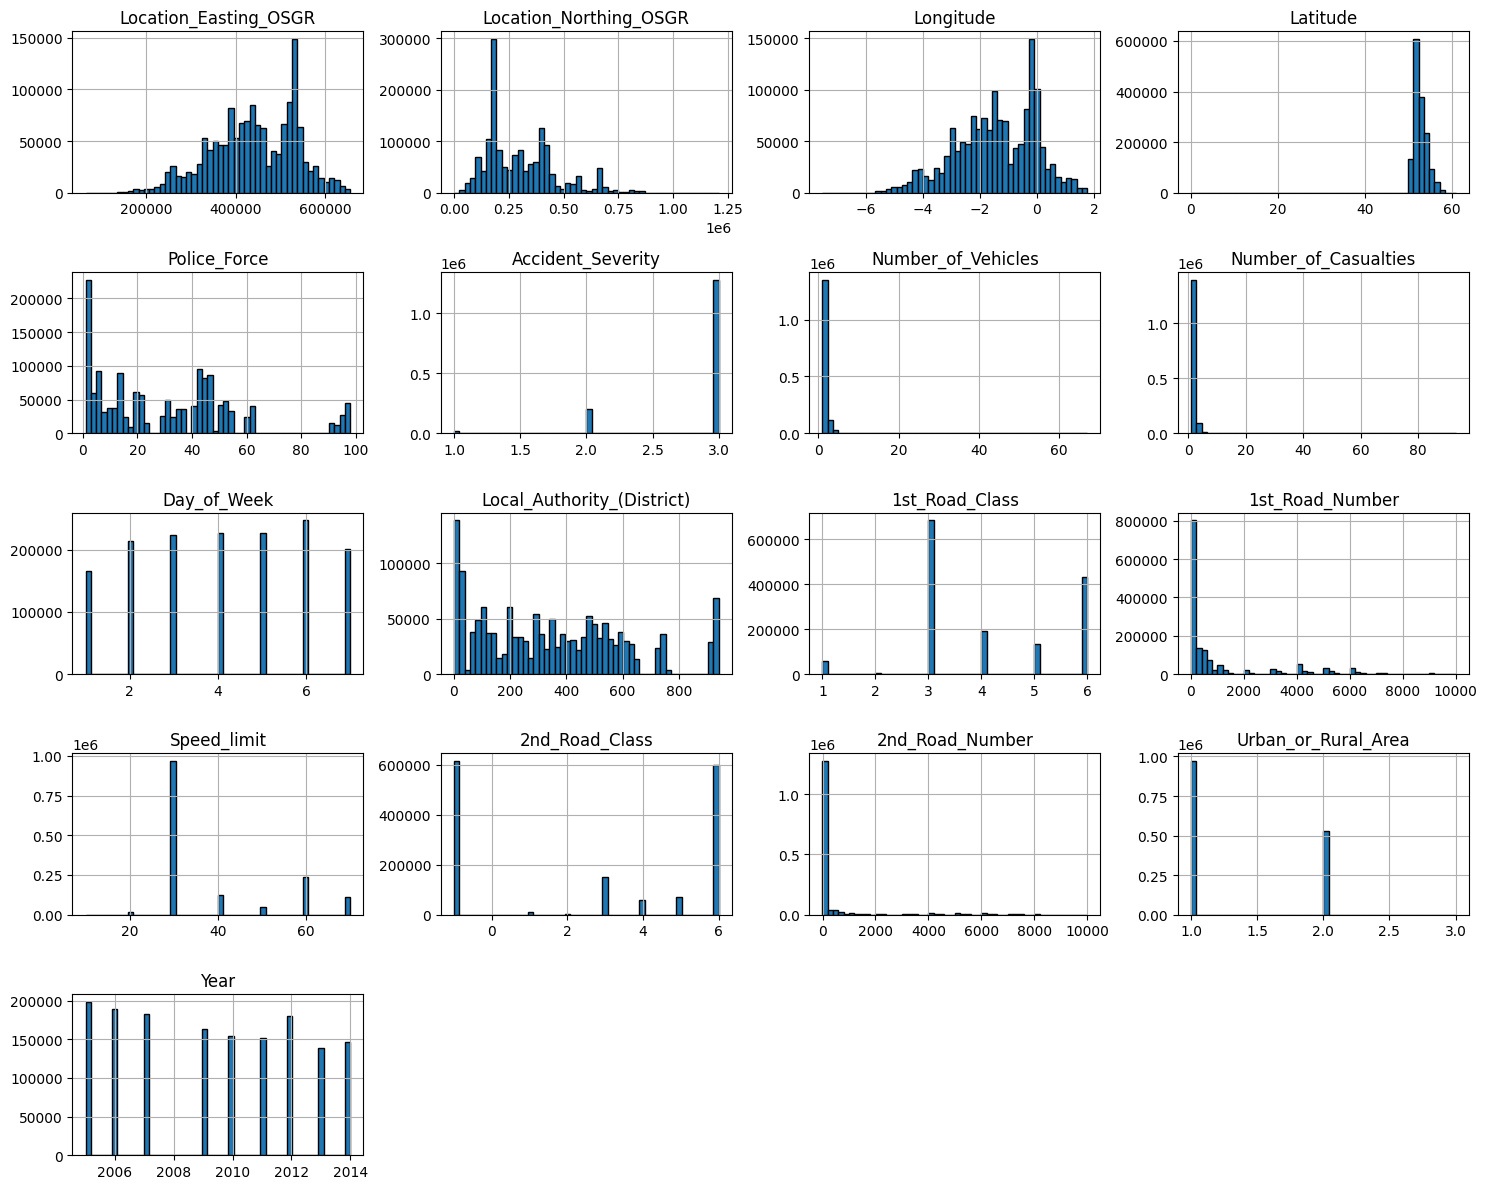

In [5]:
# Numerical Data Visualization (Histograms)

import matplotlib.pyplot as plt

# Plotting and saving the image
plt.figure(figsize=(15, 8))
dataset.hist(bins=50, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.savefig("UK_Accident_Numerical_Plots.png", dpi=300, bbox_inches="tight")
plt.show()


--> Correlation Matrix and Scatter plots

In [2]:
# Correlation matrix

corr_matrix = dataset.corr(numeric_only=True)

# Choosing a numeric feature
corr_matrix["Number_of_Casualties"].sort_values(ascending=False)

Number_of_Casualties          1.0000
Number_of_Vehicles            0.2373
Speed_limit                   0.1396
Urban_or_Rural_Area           0.1160
Location_Northing_OSGR        0.0321
Latitude                      0.0310
Local_Authority_(District)    0.0143
1st_Road_Number               0.0077
Police_Force                  0.0071
2nd_Road_Number               0.0020
Day_of_Week                  -0.0015
Year                         -0.0151
2nd_Road_Class               -0.0292
Longitude                    -0.0395
Location_Easting_OSGR        -0.0408
1st_Road_Class               -0.0830
Accident_Severity            -0.0835
Name: Number_of_Casualties, dtype: float64

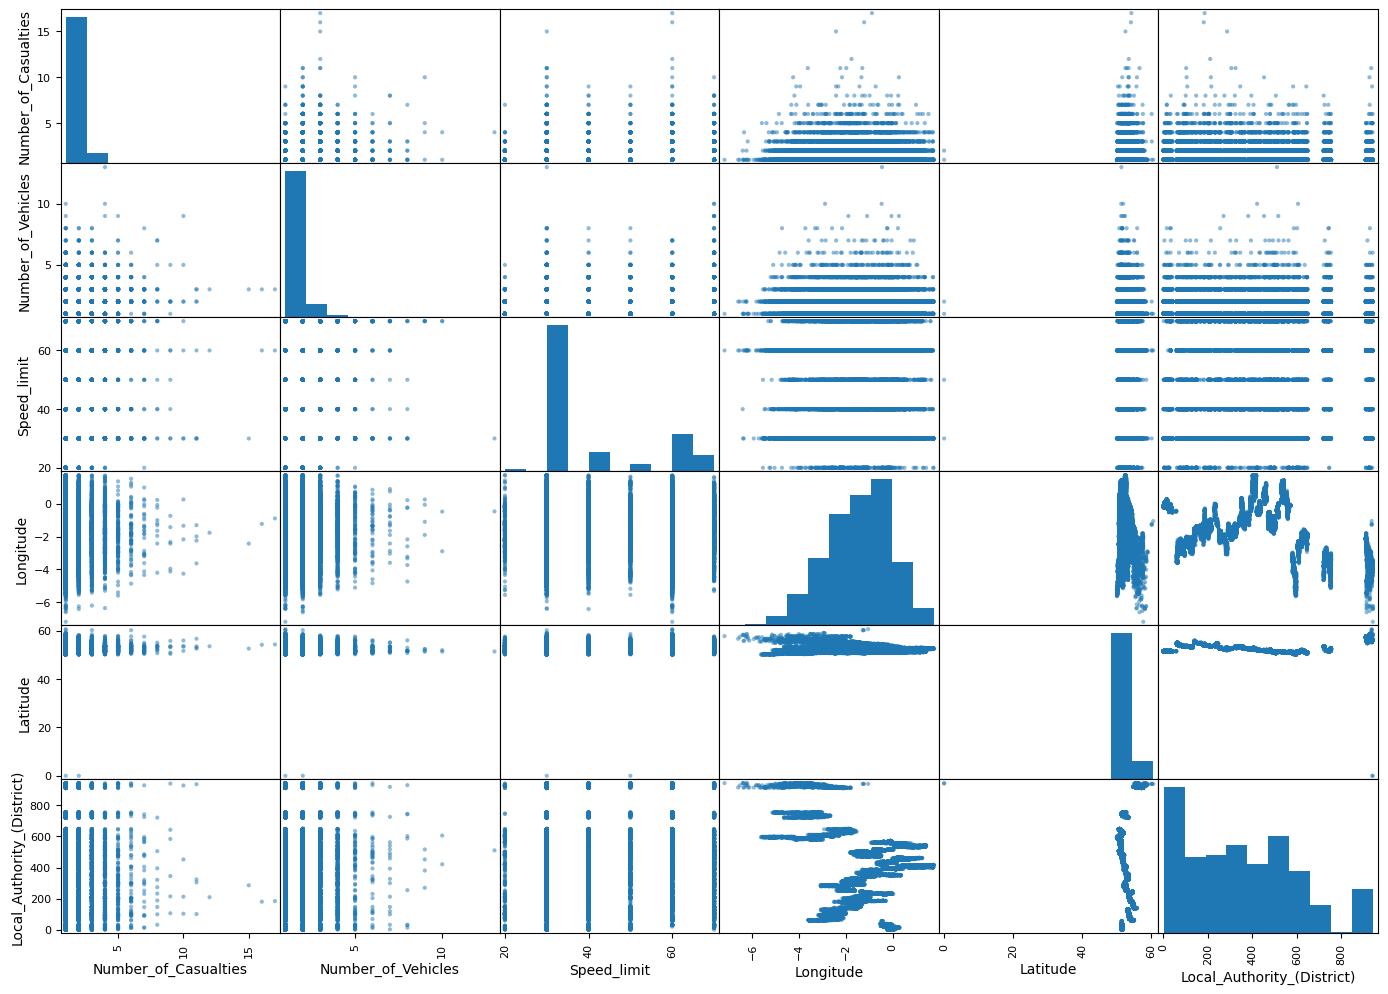

In [7]:
# Scatter plots

from pandas.plotting import scatter_matrix

attributes = ["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit", "Longitude", "Latitude", "Local_Authority_(District)"]

# Since there are 1.8 million record, i cannot show all of them so only 30,000 records are shown
scatter_matrix(dataset[attributes].sample(30000), figsize=(17,12), alpha=0.5)
plt.savefig("Scatter_matrix_plot")
plt.show()

# Some of the data are which could be numercial in nature, their data has been entered in discrete-like values, show prominent lines shown below.

-----> Box Plots (To identify Outliers)

c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


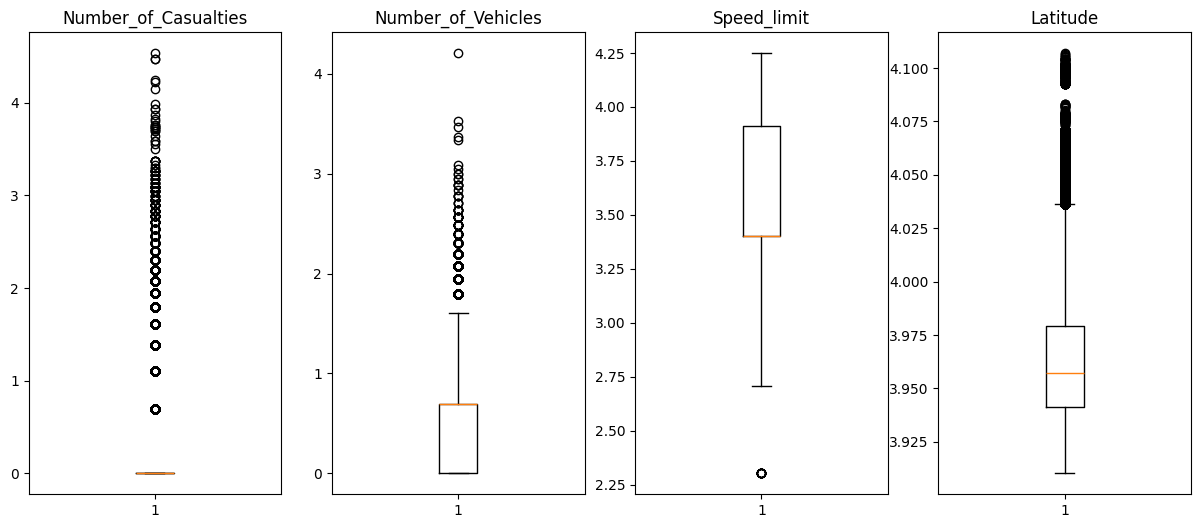

In [8]:
# Creating box Plots
# Since the ranges of each feature are very drastic in nature, they are plotted seperately

import numpy as np

# Making sure numbers generated are consistent
np.random.seed(42)

# Plotting the box plots
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
for i, col in enumerate(["Number_of_Casualties","Number_of_Vehicles","Speed_limit", "Latitude"]):
    axes[i].boxplot(np.log(dataset[col]))
    axes[i].set_title(col)

plt.savefig("BoxPlots_fig1")
plt.show()


-> Numerical Data Visualization Summary

Now from the numercial feature visualization, there are some features that have been made into a numercial feature, but they are best suited as a categorical feature. For eg: Day_of_Week (1 -7), should be described as Sunday - Saturday; Urban_or_Rural_Area needs to be categorical as well, there are only 3 values in that feature (1, 2, 3); Year is treated as a numerical feature; Accident_Severity is treated as (1, 2, 3), they should be converted to categorical too.

This is to make sure that the model doesn't extract the integar value of the dataset but rather the classical value which can be further done by one-hot encoding.

6. Data Preprocessing

Now, before correlation matrix and scatter plots can be made, we need to rmove the unneccesary features, fill in null values and convert categorical values to numerical values.

-----> Dropping Useless Features

In [3]:
# I am going to drop Special_Conditions_At_Site, Carriageway_Hazards, Pedestrian_Crossing-Human_Control, LSOA_Of_Accident_Location.

dataset.drop(['Special_Conditions_at_Site', 'Carriageway_Hazards', 'Pedestrian_Crossing-Human_Control', 'LSOA_of_Accident_Location'], axis=1, inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

In [11]:
# Fixing the null values in the dataset
# The features that have null values are: Location_Easting_OSGR, Longitude, Time, Junction_Control, Pedestrian_Crossing-Physical_Facilities.
# Finding number of null values of the said features

dataset.isnull().sum()


Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Control            

------->  Filling in the Missing Values

In [9]:
# Describing the features containing null values

features_containing_null = ["Location_Easting_OSGR", "Longitude", "Time", "Junction_Control", "Pedestrian_Crossing-Physical_Facilities"]
print(dataset[features_containing_null].describe(include="all"))


        Location_Easting_OSGR    Longitude     Time         Junction_Control  \
count            1504150.0000 1504150.0000  1504150                  1504150   
unique                    NaN          NaN     1440                        5   
top                       NaN          NaN    17:00  Giveway or uncontrolled   
freq                      NaN          NaN    14765                   733940   
mean              439621.4278      -1.4366      NaN                      NaN   
std                95112.9669       1.3980      NaN                      NaN   
min                64950.0000      -7.5162      NaN                      NaN   
25%               375068.2500      -2.3738      NaN                      NaN   
50%               439960.0000      -1.4037      NaN                      NaN   
75%               523050.0000      -0.2215      NaN                      NaN   
max               655370.0000       1.7594      NaN                      NaN   

       Pedestrian_Crossing-Physical_Fac

The features added are categorical and numeric both. So missing values added will be the mean values for numerical and most frequent values for categorical

In [13]:
# Data Preprocessing using Transformation Pipeline

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

# Making sure numbers generated are consistent
np.random.seed(42)

numeric_features = ["Police_Force", "Local_Authority_(District)", "1st_Road_Number", "2nd_Road_Number",  "Number_of_Vehicles", "Number_of_Casualties"]
categorical_features = ["Accident_Severity", "Day_of_Week", "1st_Road_Class", "Road_Type", "Speed_limit", "Junction_Control", "2nd_Road_Class", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "Year"]

dataset[categorical_features] = dataset[categorical_features].astype(str)
dataset.replace("NaN", np.nan, inplace=True)

dataset["Time"] = dataset["Time"].astype(str)

# Taking care of these identifier features
special_features = ["Longitude", "Location_Easting_OSGR"]
imputer = SimpleImputer(strategy="median")
dataset[special_features] = imputer.fit_transform(dataset[special_features])

time_imputer = SimpleImputer(strategy="most_frequent")
dataset[["Time"]] = time_imputer.fit_transform(dataset[["Time"]])

# Pipeline for categorical features
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("convert_to_str", FunctionTransformer(lambda x: x.astype(str), validate=False, feature_names_out="one-to-one")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Pipeline for numerical features (with standardization)
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ("cat", categorical_pipeline, categorical_features),
    ("num", numerical_pipeline, numeric_features)
])

transformed_data = preprocessor.fit_transform(dataset)

feature_names = preprocessor.get_feature_names_out()
transformed_dataset = pd.DataFrame(transformed_data, columns=feature_names)


In [14]:
# Checking whether imputation was successful or not
print(dataset[features_containing_null].isnull().sum())

Location_Easting_OSGR                      0
Longitude                                  0
Time                                       0
Junction_Control                           0
Pedestrian_Crossing-Physical_Facilities    0
dtype: int64


In [15]:
# Checking for the changes
print(transformed_dataset.describe())

       cat__Accident_Severity_1  cat__Accident_Severity_2  \
count              1504150.0000              1504150.0000   
mean                     0.0129                    0.1360   
std                      0.1130                    0.3427   
min                      0.0000                    0.0000   
25%                      0.0000                    0.0000   
50%                      0.0000                    0.0000   
75%                      0.0000                    0.0000   
max                      1.0000                    1.0000   

       cat__Accident_Severity_3  cat__Day_of_Week_1  cat__Day_of_Week_2  \
count              1504150.0000        1504150.0000        1504150.0000   
mean                     0.8511              0.1097              0.1421   
std                      0.3560              0.3125              0.3492   
min                      0.0000              0.0000              0.0000   
25%                      1.0000              0.0000              0.0000   


7. Model Selection and Training

Since I have classification model, the three different model that I use is Logistic Regression, Gradient Boosting and Random Forest. Before I can start the training, I need to shuffle and split my dataset into training set and testing set.

In [16]:
from sklearn.model_selection import train_test_split

# Since splitting is done after the transformation, I have to cater to all the 3 columns created by one-hot encoding
severity_columns = [col for col in transformed_dataset.columns if "cat__Accident_Severity" in col]

# Seperating the X and y features from the transformed_dataset
X = transformed_dataset.drop(columns=severity_columns)
y = transformed_dataset[severity_columns].idxmax(axis=1).str[-1].astype(int)

# Splitting it into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Checking the length of train set
print(f"Length of X features (Train): {len(X_train)}")
print(f"Length of y feature (Train) : {len(y_train)}\n")

# Checking the length of test set
print(f"Length of X features (Test): {len(X_test)}")
print(f"Length of y feature (Test) : {len(y_test)}")


Length of X features (Train): 1203320
Length of y feature (Train) : 1203320

Length of X features (Test): 300830
Length of y feature (Test) : 300830


In [18]:
# Checking the total records (Split check)

print(f"Length of test + train: {len(X_train) + len(X_test)}")
print(f"Length of transformed dataset: {len(transformed_dataset)}")

Length of test + train: 1504150
Length of transformed dataset: 1504150


-----> Model 1: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print accuracy, precision, recall and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8511152478143802
Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.00      0.00      3859
           2       0.35      0.00      0.00     40908
           3       0.85      1.00      0.92    256063

    accuracy                           0.85    300830
   macro avg       0.48      0.33      0.31    300830
weighted avg       0.78      0.85      0.78    300830



From the accuracy score recorded, I have too many instances of class 3, and very less of class 1 and class 2, causing my model to ignore those and rapidly decreasing the accuracy to 0.5 percent. Now we try to improve this by detailed analysis of the dataset

In [20]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(1): np.int64(15582), np.int64(2): np.int64(163596), np.int64(3): np.int64(1024142)}


From this, we can check that there is a huge issue of representative data present in the dataset, so we need to fix this problem, because similar problems will arise in other models too.

In [35]:
from imblearn.over_sampling import SMOTE

# Distributing the class properly
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=100000, random_state=42, stratify=y_train)

smote = SMOTE(sampling_strategy={1: 8000, 2: 60000, 3: 256063}, random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)


In [22]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = log_reg.predict(X_test)

# Print accuracy, precision, recall and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))

Accuracy: 0.512262739753349
Classification Report:
               precision    recall  f1-score   support

           1       0.03      0.60      0.07      3859
           2       0.17      0.34      0.23     40908
           3       0.91      0.54      0.68    256063

    accuracy                           0.51    300830
   macro avg       0.37      0.50      0.32    300830
weighted avg       0.80      0.51      0.61    300830



Using SMOTE to generate samples for fewer class samples, and properly splitting the data to maintain the distribution. The recall was majorly improved, but the precision and accuracy went down significantly. This is the recall-precision trade off. Maybe this might be improved by using different models.

In [ ]:
# Now using cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# Use Stratified K-Folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=skf, scoring="roc_auc", n_jobs=-1)
y_pred_cv = cross_val_predict(log_reg, X_train_resampled, y_train_resampled, cv=3, n_jobs=-1)

# display result and accuracy
print("Cross-Validation Classification Report:\n", classification_report(y_train_resampled, y_pred_cv))
print("Stratified Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(cv_scores.mean(), cv_scores.std()))


Cross-Validation Classification Report:
               precision    recall  f1-score   support

           1       0.14      0.00      0.00      8000
           2       0.42      0.01      0.01     60000
           3       0.79      1.00      0.88    256063

    accuracy                           0.79    324063
   macro avg       0.45      0.34      0.30    324063
weighted avg       0.71      0.79      0.70    324063

Stratified Cross-Validation Accuracy: nan ± nan


The accuracy is nan, due to the huge class imbalance in the dataset.

-----> Model 2: Random Forest

In [ ]:
# Training with random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Printing accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8511883788186019
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      3859
           2       0.00      0.00      0.00     40908
           3       0.85      1.00      0.92    256063

    accuracy                           0.85    300830
   macro avg       0.28      0.33      0.31    300830
weighted avg       0.72      0.85      0.78    300830



c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Again same problem, the dataset is has more class 3 entries than class 1 and 2. Apply SMOTE and class balancing here, to improve the accuracy

In [ ]:
# Random Forest with Class Balancing and SMOTE

# Splitting the dataset
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=100000, random_state=42, stratify=y_train)

# Setting up SMOTE and training the Random Forest Model
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

rf_clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42, max_depth=10, min_samples_split=10, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = rf_clf.predict(X_test)

# Printing accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))

Accuracy: 0.6983146627663465
Classification Report:
               precision    recall  f1-score   support

           1       0.05      0.39      0.09      3859
           2       0.22      0.26      0.24     40908
           3       0.89      0.77      0.83    256063

    accuracy                           0.70    300830
   macro avg       0.39      0.48      0.39    300830
weighted avg       0.79      0.70      0.74    300830



Now the accuracy went down, but it is much better than the previous model (Logistic Regression). The recall and precision for class 1 and 2 have improved majorly than the previous model

In [42]:
# Now Using Stratified Cross Validation
from sklearn.ensemble import RandomForestClassifier

# Use Stratified K-Folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42, n_jobs=-1)

# Store accuracy scores
cv_scores = []
y_true_all = []
y_pred_all = []

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Perform Stratified Cross-Validation with SMOTE in each fold
for train_idx, val_idx in skf.split(X_train_np, y_train_np):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]
    
    # Apply SMOTE only to the training fold
    smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Train Random Forest
    rf_clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict on validation fold
    y_pred = rf_clf.predict(X_val_fold)

    y_true_all.extend(y_val_fold)
    y_pred_all.extend(y_pred)
    
    # Compute accuracy
    acc = accuracy_score(y_val_fold, y_pred)
    cv_scores.append(acc)

# Print final results
print("Stratified Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(np.mean(cv_scores), np.std(cv_scores)))
print("Cross-Validation Classification Report:\n", classification_report(y_true_all, y_pred_all))


Stratified Cross-Validation Accuracy: 0.58 ± 0.00
Cross-Validation Classification Report:
               precision    recall  f1-score   support

           1       0.03      0.62      0.07     15582
           2       0.21      0.27      0.24    163596
           3       0.90      0.63      0.74   1024142

    accuracy                           0.58   1203320
   macro avg       0.38      0.51      0.35   1203320
weighted avg       0.80      0.58      0.67   1203320



The accuracy decreased and so did the precision and recall for class 1 and 2. Only class 3 improved

------> Model 3: Gradient Boosting

In [23]:
# Training the model Gradient Boosting

from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_clf = HistGradientBoostingClassifier(max_iter=30, learning_rate=0.3, max_depth=1, max_bins=255, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8511750822723797
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      3859
           2       0.00      0.00      0.00     40908
           3       0.85      1.00      0.92    256063

    accuracy                           0.85    300830
   macro avg       0.28      0.33      0.31    300830
weighted avg       0.72      0.85      0.78    300830



c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Now with SMOTE and class balancing

In [24]:
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Gradient Boosting model
gb_clf = HistGradientBoostingClassifier(max_iter=20, learning_rate=0.3, max_depth=1, max_bins=128, random_state=42)

# Train the model with sample weights
gb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = gb_clf.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))


Accuracy: 0.5738656384004255
Classification Report:
               precision    recall  f1-score   support

           1       0.04      0.62      0.07      3859
           2       0.20      0.29      0.24     40908
           3       0.90      0.62      0.73    256063

    accuracy                           0.57    300830
   macro avg       0.38      0.51      0.35    300830
weighted avg       0.80      0.57      0.66    300830



For the 3rd Model, I used GradientBoostingSampler, but that kept crashing my system due to its sequential method of training data. So I changed to HistGradientBoostingClassifier, which is designed for larger datasets and parallelizes the system, significantly reducing the exceution time. SMOTE and class balancing did improve the recall and precision, but the accuracy was decreased massively.

In [43]:
# Using Stratified Cross-Validation

from sklearn.ensemble import HistGradientBoostingClassifier

# Use Stratified K-Folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize HistGradientBoosting
hgb_clf = HistGradientBoostingClassifier(max_iter=100, max_depth=6, random_state=42)

# Store accuracy scores
cv_scores = []
y_true_all = []
y_pred_all = []

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Perform Stratified Cross-Validation with SMOTE in each fold
for train_idx, val_idx in skf.split(X_train_np, y_train_np):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]
    
    # Apply SMOTE only to the training fold
    smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Train HistGradientBoostingClassifier
    hgb_clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict on validation fold
    y_pred = hgb_clf.predict(X_val_fold)

    y_true_all.extend(y_val_fold)
    y_pred_all.extend(y_pred)
    
    # Compute accuracy
    acc = accuracy_score(y_val_fold, y_pred)
    cv_scores.append(acc)

# Print final results
print("Stratified Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(np.mean(cv_scores), np.std(cv_scores)))
print("Cross-Validation Classification Report:\n", classification_report(y_true_all, y_pred_all))

Stratified Cross-Validation Accuracy: 0.78 ± 0.00
Cross-Validation Classification Report:
               precision    recall  f1-score   support

           1       0.07      0.19      0.10     15582
           2       0.25      0.20      0.22    163596
           3       0.87      0.88      0.88   1024142

    accuracy                           0.78   1203320
   macro avg       0.40      0.42      0.40   1203320
weighted avg       0.78      0.78      0.78   1203320



The accuracy improved a lot, but the precision and recall went down for class 1 and 2

8. Hyperparameter Tuning

-----> For Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np
from scipy import sparse

# Define hyperparameter grid for Logistic Regression
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200]
}

# Initialize Logistic Regression with warm_start=True
log_reg = LogisticRegression(random_state=42, warm_start=True)

# Use Stratified K-Folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Convert data to float32 for memory efficiency
X_train_np = np.array(X_train, dtype=np.float32)
y_train_np = np.array(y_train)

# Use sparse format if the dataset is sparse
X_train_np = sparse.csr_matrix(X_train_np)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=3,  # Reduce iterations
    cv=skf,
    scoring='accuracy',
    n_jobs=1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_np, y_train_np)

# Print best parameters and results
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END C=0.08858667904100823, max_iter=200, penalty=l1, solver=liblinear; total time= 7.2min
[CV] END C=0.08858667904100823, max_iter=200, penalty=l1, solver=liblinear; total time= 6.2min
[CV] END C=0.08858667904100823, max_iter=200, penalty=l1, solver=liblinear; total time=10.1min
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   7.6s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   9.9s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   9.4s
[CV] END C=0.012742749857031334, max_iter=200, penalty=l1, solver=liblinear; total time= 6.0min
[CV] END C=0.012742749857031334, max_iter=200, penalty=l1, solver=liblinear; total time= 7.5min
[CV] END C=0.012742749857031334, max_iter=200, penalty=l1, solver=liblinear; total time= 7.0min
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': np.float64(0.0001)}
Best Accuracy: 0.

Since hyper tuning takes a long time and resources, I was only able to perform hyper tuning on logistic regression, because for the rest of the model, they were getting very big for my 8 GB RAM.